In [ ]:
# Implement Feedforward Neural Networks with Keras and TensorFlow on MNIST Digit Dataset

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist

In [7]:
train_csv_path = 'Dataset/MNIST/Download/mnist_train.csv'
test_csv_path  = 'Dataset/MNIST/Download/mnist_test.csv'

In [8]:
import os

def files_exist():
    return os.path.exists(train_csv_path) and os.path.exists(test_csv_path)

In [12]:
if not files_exist():
    print("Files not found. Downloading MNIST dataset...")

    # Load the MNIST dataset
    mnist = tf.keras.datasets.mnist
    (x_train, y_train), (x_test, y_test) = mnist.load_data()

    # Flatten the image data for CSV storage
    x_train_flat = x_train.reshape(x_train.shape[0], -1)  # Flatten training images
    x_test_flat = x_test.reshape(x_test.shape[0], -1)     # Flatten test images

    # Convert the data to DataFrames
    train_images_df = pd.DataFrame(x_train_flat)
    train_labels_df = pd.DataFrame(y_train, columns=['label'])
    test_images_df = pd.DataFrame(x_test_flat)
    test_labels_df = pd.DataFrame(y_test, columns=['label'])

    # Combine images and labels for train and test sets
    train_combined_df = pd.concat([train_images_df, train_labels_df], axis=1)
    test_combined_df = pd.concat([test_images_df, test_labels_df], axis=1)

    # Save the combined data to CSV files
    train_combined_df.to_csv(train_csv_path, index=False)
    test_combined_df.to_csv(test_csv_path, index=False)

    print("MNIST dataset downloaded and saved as separate CSV files.")
else:
    print("MNIST dataset files already exist. Loading from local files.")


Files not found. Downloading MNIST dataset...
MNIST dataset downloaded and saved as separate CSV files.


In [14]:
# The above mentioned step is optional just to save internet 🥲
# You can use this method instead
# (x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [15]:
train_data = pd.read_csv(train_csv_path)
test_data = pd.read_csv(test_csv_path)

In [16]:
x_train = train_data.iloc[:, :-1].values
y_train = train_data.iloc[:, -1].values

x_test = test_data.iloc[:, :-1].values
y_test = test_data.iloc[:, -1].values

x_train = x_train.reshape(-1, 28, 28, 1)
x_test  = x_test.reshape(-1, 28, 28, 1)

y_train = y_train.reshape(-1, 1)
y_test  = y_test.reshape(-1, 1)

In [19]:
for i in (x_train, y_train, x_test, y_test):
    print(i.shape)

(60000, 28, 28, 1)
(60000, 1)
(10000, 28, 28, 1)
(10000, 1)


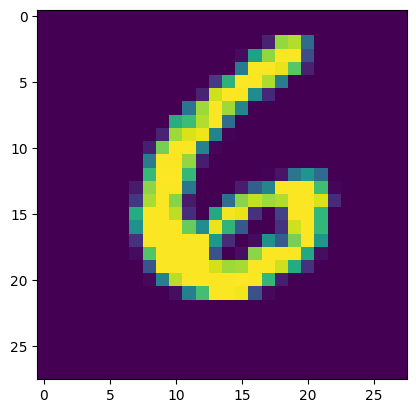

[6]


In [24]:
plt.imshow(x_train[90])
plt.show()

print(y_train[90])

In [25]:
print(np.unique(y_train))
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [26]:
x_train = x_train / 255
x_test = x_test / 255

In [27]:
print(x_train.shape, x_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [28]:
# Build Network

In [31]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), 
    keras.layers.Dense(50, activation='relu', name='L1'),
    keras.layers.Dense(50, activation='relu', name='L2'),
    keras.layers.Dense(10, activation='softmax', name='L3')
])

C:\Program Files\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [32]:
model.compile(optimizer='sgd', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [33]:
# Train Neural Network

In [34]:
history = model.fit(x_train, y_train,
                    batch_size=30, 
                    epochs=10, 
                    validation_data=(x_test, y_test),
                    shuffle=True)

Epoch 1/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6758 - loss: 1.1554 - val_accuracy: 0.9051 - val_loss: 0.3308
Epoch 2/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9082 - loss: 0.3185 - val_accuracy: 0.9273 - val_loss: 0.2560
Epoch 3/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9257 - loss: 0.2581 - val_accuracy: 0.9349 - val_loss: 0.2244
Epoch 4/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9371 - loss: 0.2214 - val_accuracy: 0.9429 - val_loss: 0.1967
Epoch 5/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9433 - loss: 0.1978 - val_accuracy: 0.9468 - val_loss: 0.1814
Epoch 6/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9497 - loss: 0.1749 - val_accuracy: 0.9506 - val_loss: 0.1690
Epoch 7/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9550 - loss: 0.1571 - val_accuracy: 0.9556 - val_loss: 0.1540
Epoch 8/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9578 - loss: 0.1456 - 

<Axes: >

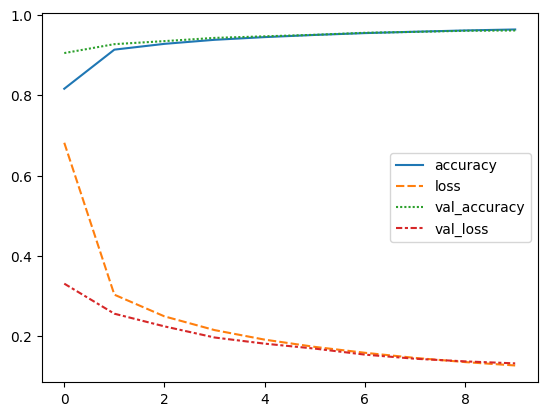

In [35]:
import seaborn as sns
sns.lineplot(model.history.history)

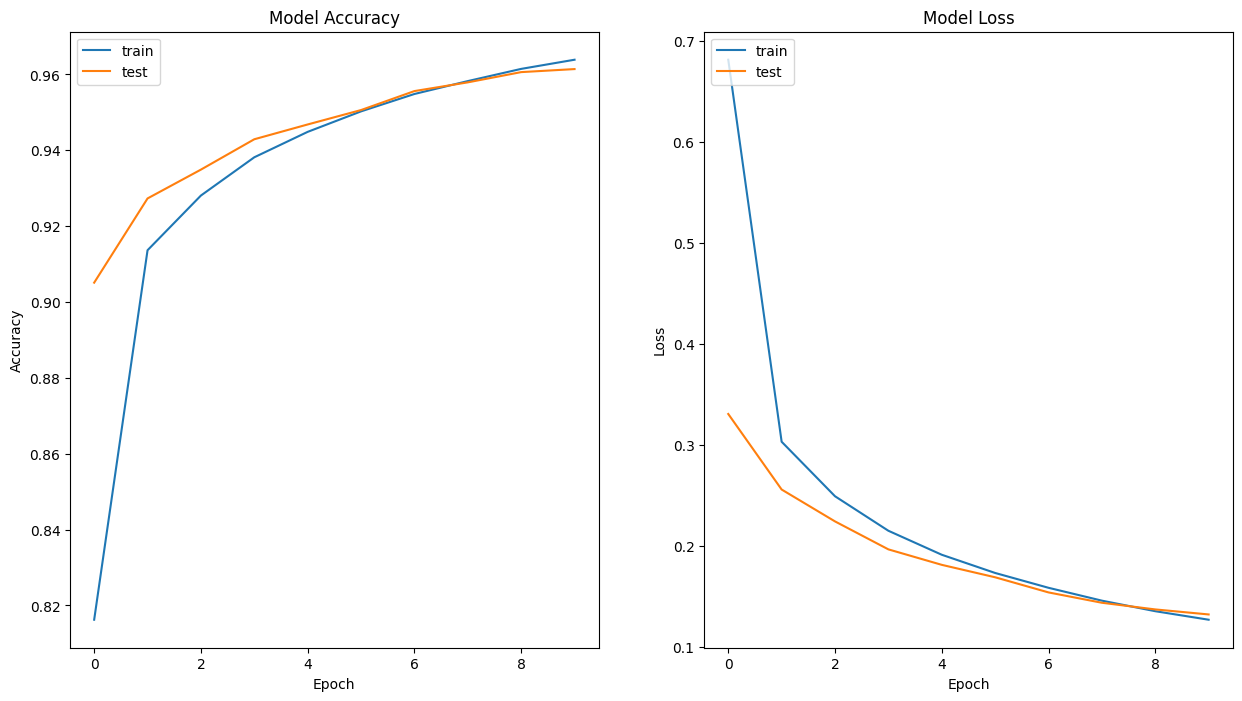

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize=[15, 8])

# Summarize history for accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='upper left')

# Summarize history for Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc='upper left')

plt.show()

In [40]:
# Evaluate

In [41]:
loss, accuracy = model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9543 - loss: 0.1546


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


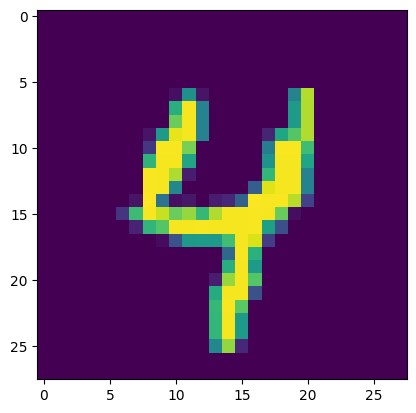

4


In [42]:
predicted_value = model.predict(x_test)
plt.imshow(x_test[1111])
plt.show()
print(np.argmax(predicted_value[1111], axis=0))

In [43]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

313/313 - 0s - 1ms/step - accuracy: 0.9614 - loss: 0.1322
Test Loss: 0.1322183907032013
Test Accuracy: 0.9613999724388123
